In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Условие 1: Задача 1
Постройте график <br>
Назовите график <br>
Сделайте именование оси x и оси y <br>
Сделайте выводы <br>

#### 1.1. Скачать данные в закрепе к уроку

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 1.2 Изучите стоимости недвижимости


count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

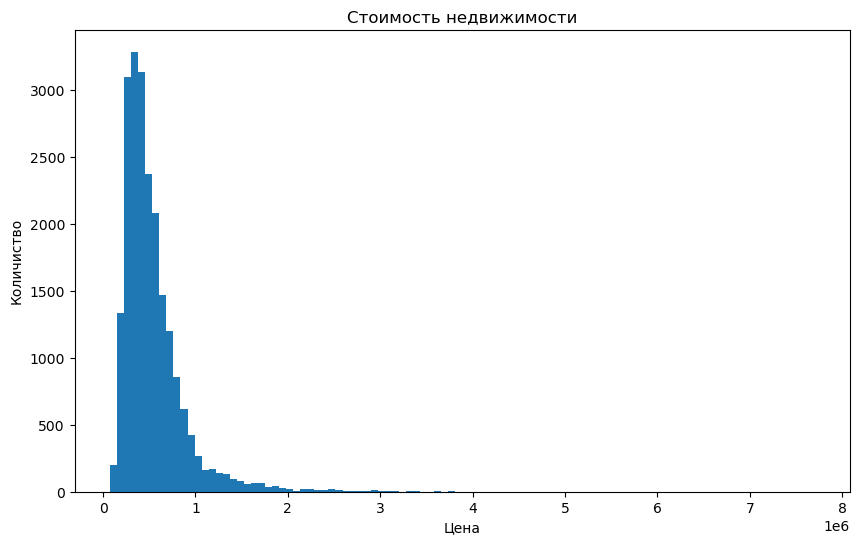

In [3]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=100)
plt.title('Стоимость недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количиство')
df['price'].describe()

#### 1.3 Изучите распределение квадратуры жилой

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

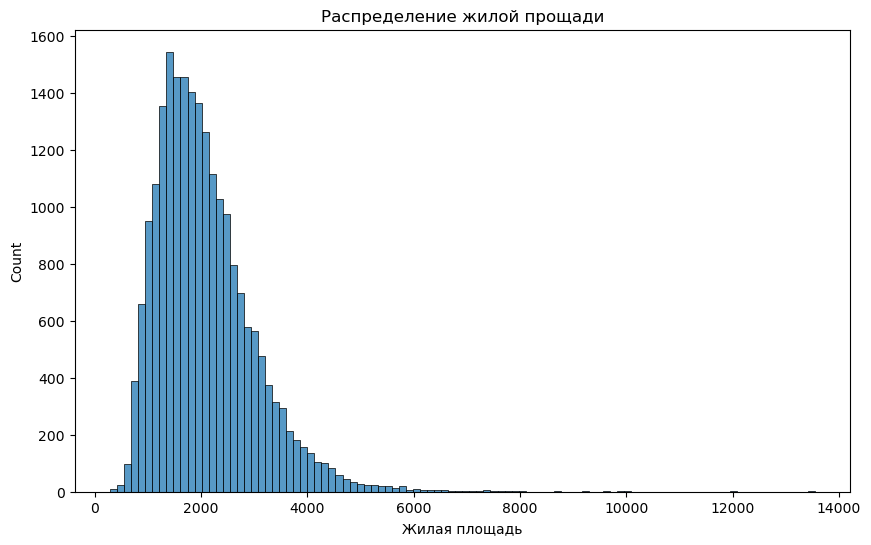

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sqft_living'], bins=100)
plt.title('Распределение жилой прощади')
plt.xlabel('Жилая площадь')
df['sqft_living'].describe()

Всего 21613 объектов. Самое большое кол-во предложенных вариантов около 1500 площадью ~1700 кв.м. <br> Средняя жилая площадь домов 2079.8 кв м.<br>
В основном площадь домов колеблется от 1427 до 2550 кв.м.<br>
Максимальная площадь - 13540 кв.м. Минимальная площадь - 290 кв.м.


#### 1.4 Изучите распределение года постройки

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

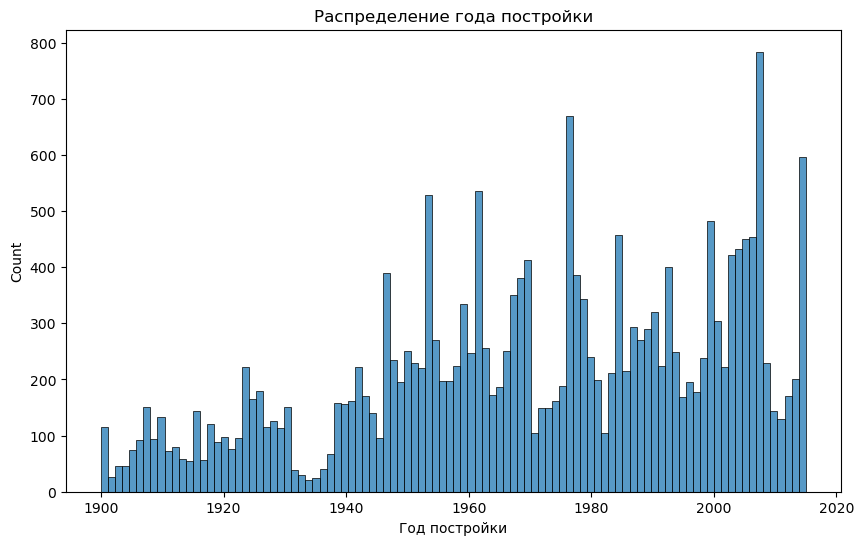

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['yr_built'], bins=100)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
df['yr_built'].describe()

Всего 21613 объектов.<br> На графике видно несколько пиков, наибольшее кол-во домов построено ~ 2010, 2015, 1977.

Средний год постройки 1971 <br>
Основной период строительства 1951 до 2015 <br>
Самый ранний год постройки - 1900. Самый поздний - 2015 кв.м. <br>
На графике видны "провалы" (например, 1930-1938 работы практически не ведутся, 2011-2014 замедление темпов строительства) и "пики" (например 2007,2013). Можно сделать выводы о спаде темпов строительства в периоды 1973-76, 2010-13 и пиках застройки и развитии строительства в 2007, 2013.Также можно заметить, что пики - это в основном еденичные года, которым предшествует плавно возрастающий темп строительства, за ними же следуют периоды явного спада.<br>

### В целом заметна постоянно наростающая положительная динамика развития строительного рынка, за исключением периода 1930-1938 годы, этот период очевидного кризиса совпадает с периодом Великой депрессии в Америке 30-х годов 20го века. Также после 2007 заметен сильный спад, что, скорее всего, связано с финансовым кризисом 2008 года.


### Условие 2: 2 задача

#### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график <br>
Сделайте выводы

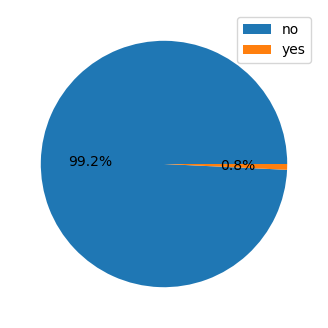

In [21]:
data = df['waterfront'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%')
plt.legend(['no', 'yes']);

In [23]:
data = df['waterfront'].value_counts()
data.index = ['no', 'yes']
data.head()

no     21450
yes      163
Name: waterfront, dtype: int64

#### Домов с видом на набережную совсем немного, чуть менее процента, всего 163 дома из 21450

#### 2.2 Изучите распределение этажей домов

In [8]:
data = df['floors'].value_counts()
data

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

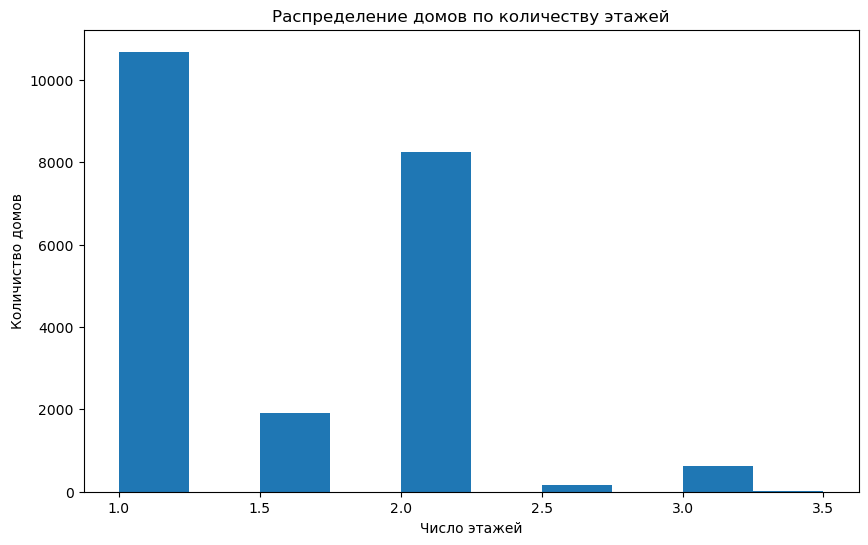

In [9]:
plt.figure(figsize=(10, 6))

plt.hist(df['floors'])

plt.title('Распределение домов по количеству этажей')
plt.xlabel('Число этажей')
plt.ylabel('Количиство домов');

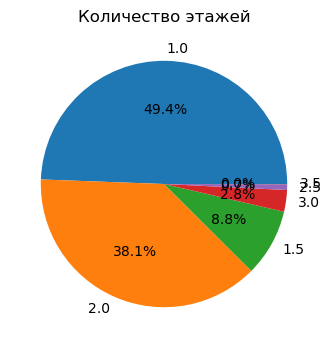

In [27]:
data = df['floors'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%', labels=data.index)
plt.title('Количество этажей');

##### Дома в основном одно- и двух- этажные. Половина домов одноэтажные, двуэтажных домов ~40%,  1,5 этажа ~9%, остаток разделяют между собой дома 3,0 - 3,5 этажа. 

#### 2.3 Изучите распределение состояния домов

In [10]:
data = df['grade'].value_counts()
data

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

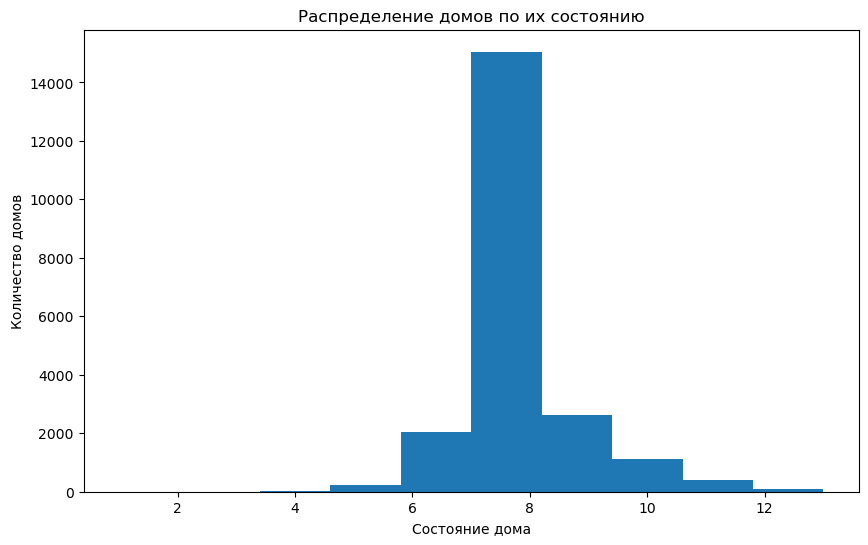

In [11]:
plt.figure(figsize=(10, 6))

plt.hist(df['grade'])

plt.title('Распределение домов по их состоянию')
plt.xlabel('Состояние дома')
plt.ylabel('Количество домов');

#### Основная часть домов в хорошем состоянии.

### Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

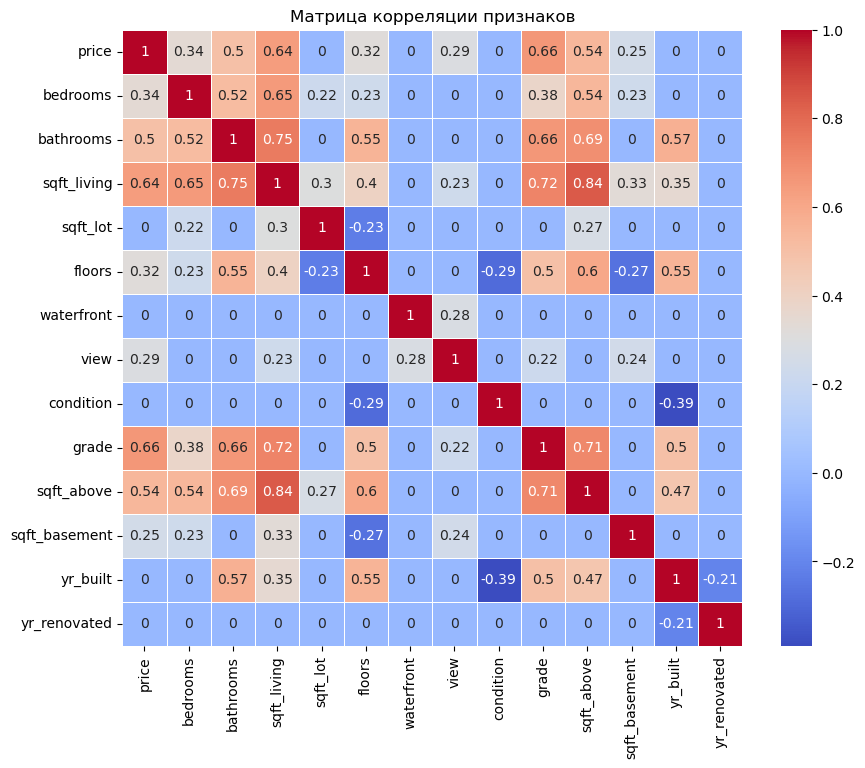

In [26]:
plt.figure(figsize=(10, 8))

corrMatrix = round(df.drop(
    columns=['id', 'date', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
).corr(method='spearman'), 2)
corrMatrix[abs(corrMatrix) < 0.2] = 0

sns.heatmap(corrMatrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title("Матрица корреляции признаков");

#### На стоимость дома в основном влияет размер жилой площади и класс недвижимости. Также цена зависит от кол-ва ванных комнат и площади чердака, так как большинство домов одноэтажные. В меньшей степени корелляция цены ощутима от кол-ва спален, вида из окна и наличия подвала.
#### На стоимость не влияет - расположен ли дом на береговой линии или нет, также не имеет значение состояние, год постройки и реновации/ремонта, так как эти праметры для большинства домов одинаковы.

<Figure size 800x600 with 0 Axes>

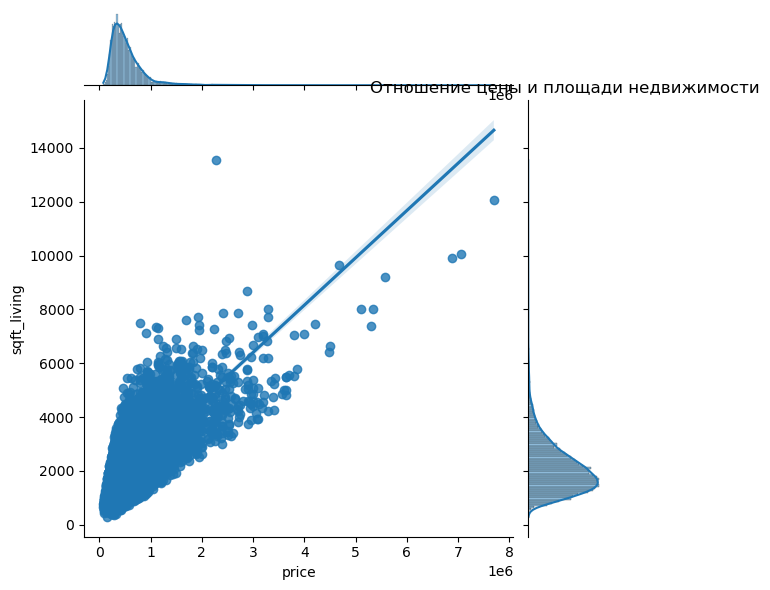

In [15]:
plt.figure(figsize=(8, 6))

sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')
plt.title('Отношение цены и площади недвижимости');

#### Чем больше площадь дома, тем выше цена. Из графика видно, что дома с жиолой площадью более 4000 и более имеют бОльшой разброс в стоимости, вероятно так как дополнительные характеристики становятся более значимы.

In [32]:
def formDepData (col1, col2, df):
    data = df.groupby(col1) \
        .agg({col2: 'mean'}) \
        .sort_index().reset_index()
    
    data[col1] = data[col1].apply(
        lambda val:
            str(val) 
    )

    return data

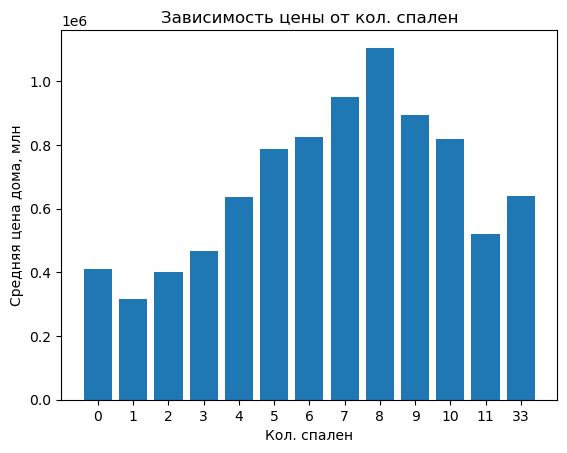

In [33]:
data = formDepData('bedrooms', 'price', df)

plt.bar(
    data['bedrooms'],
    data['price']
)

plt.title("Зависимость цены от кол. спален")
plt.xlabel("Кол. спален")
plt.ylabel("Средняя цена дома, млн");

#### Дома без спальни  стоят чуть дороже чем с одной спальней, возможно это нежилые дома, специфически оборудованные хорошо спланированны дома-студии.  Дома с количеством спален до 4х находятся приблизительно в одном ценовом диапазоне, далее стоимость растет с увелечением количества спален до пика - 8 спален (наилучшее кол-во спален для одной большой семьи, а также для размещения гостей/родственников). Дома с кол-вом спален 9 и более стоят не так дорого, возможно они менее востребованы, так как в расположении такого большого кол-ва человек/семей в одном доме нет потребности, а соответственно и спроса.

<Figure size 800x600 with 0 Axes>

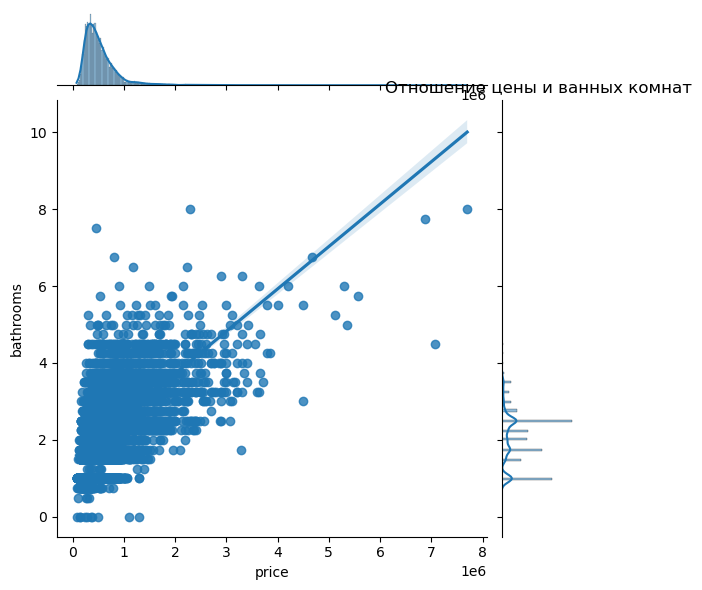

In [17]:
plt.figure(figsize=(8, 6))

sns.jointplot(x=df['price'], y=df['bathrooms'], kind='reg')
plt.title('Отношение цены и ванных комнат');

#### Наблюдается увеличении цены при росте кол-ва ванных комнат

<Figure size 800x600 with 0 Axes>

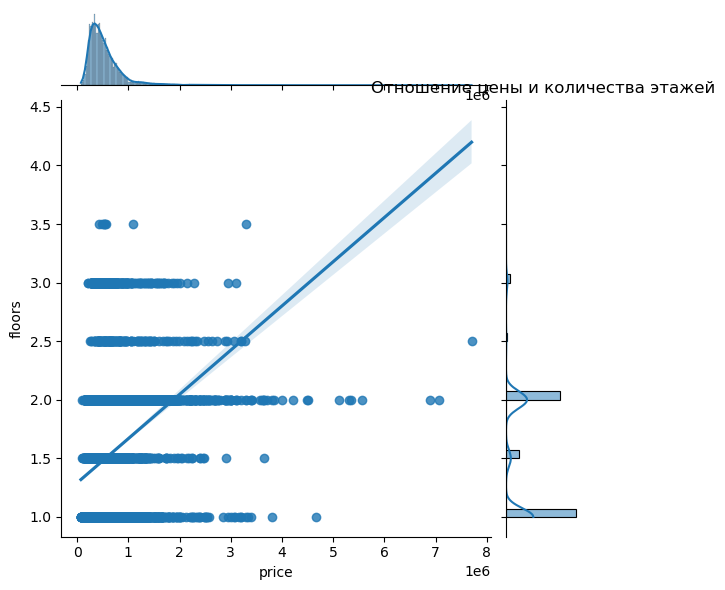

In [18]:
plt.figure(figsize=(8, 6))

sns.jointplot(x=df['price'], y=df['floors'], kind='reg')
plt.title('Отношение цены и количества этажей');

#### Наиболее дорогими являтся двухэтажные дома. Одноэтажные и дома 2,5 этажа немного дешевле и находятся в одном ценовом диапазоне.

<Figure size 800x600 with 0 Axes>

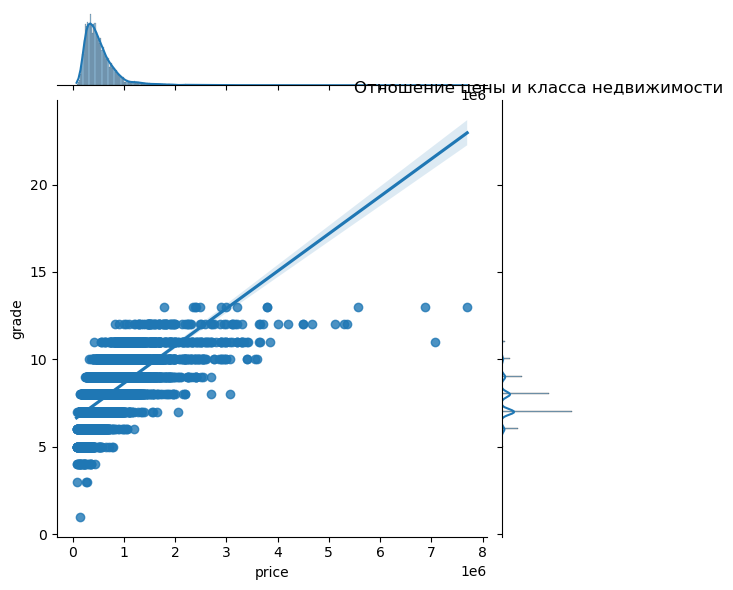

In [19]:
plt.figure(figsize=(8, 6))

sns.jointplot(x=df['price'], y=df['grade'], kind='reg')
plt.title('Отношение цены и класса недвижимости');

#### Заметно равномерное увеличение цены в зависимости от увеличения класса недвижимости